<a href="https://colab.research.google.com/drive/1dn4cIha_iR-5GGcCLKvC1a4v7kB0npnU?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning SP 2022/2023

- Prof. Cesare Alippi
- Giorgia Adorni ([`giorgia.adorni@usi.ch`](mailto:giorgia.adorni@usi.ch))<br>
- Fatima Ezzeddine ([`fatima.ezzeddine@usi.ch`](mailto:fatima.ezzeddine@usi.ch))<br>
- Alessandro Manenti ([`alessandro.manenti@usi.ch`](mailto:alessandro.manenti@usi.ch))

---

# Lab 06: Other methods

In this lab we will see how to use some of the more advanced methods that we saw in the last lectures.

# A) Support Vector Machines

Let's see how we can use Support Vector Machines and the kernel trick to solve classification problems where linear approaches fail. 

Remeber, a **kernel** (oversimplifying a lot) is a function that gives us a particular measure of affinity between two points. We can use kernels in the dual formulation of the SVM problem to project the input space in a high (possibly infinite) dimensional space.

Let's start defining our usual helper functions.

In [1]:
# first we define some helper functions to generate data and plot results
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_moons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams["image.cmap"] = "PiYG_r"  # Define the colors to use in the plot
plt.rcParams["scatter.edgecolors"] = 'k'


# function to generate classification problems
def get_data(n, ctype='simple'):
  if ctype == 'simple':
    x, y = make_classification(n_features=2, 
                               n_redundant=0, 
                               n_informative=2, 
                               n_clusters_per_class=1)
    x += np.random.uniform(size=x.shape) # add some noise
  elif ctype == 'circles':
    x, y = make_circles(n, noise=0.1, factor=0.5)
  
  elif ctype == 'moons':
    x, y = make_moons(n, noise=0.1)
  else:
    raise ValueError
  return x, y

# function to plot decision boundaries
def plot_decision_surface(model, x, y, transform=lambda x:x, plot_margins=False):    
  #init figure
  fig = plt.figure()

  # Create mesh
  h = .01  # step size in the mesh
  x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
  y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

  # plot train data
  plt.scatter(x[:, 0], x[:, 1], c=y)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')

  y_pred = model.predict(transform(np.c_[xx.ravel(), yy.ravel()]))

  y_pred = y_pred.reshape(xx.shape)
  plt.contourf(xx, yy, y_pred, alpha=.2)

## A.1) The XOR problem

As already discussed, linear methods are unable to solve problems in which the classes are not linearly separable. 

The XOR problem is the classic example.

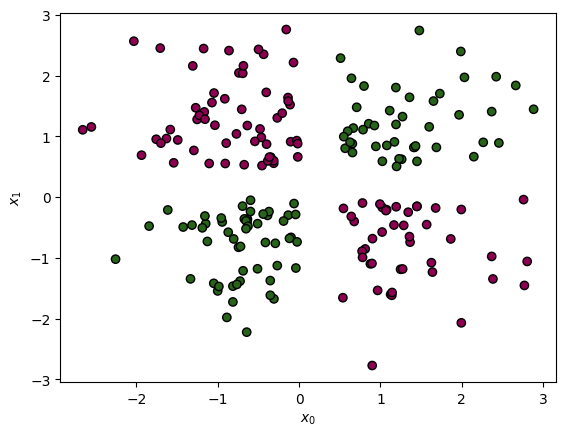

In [2]:
np.random.seed(0)

x = np.random.randn(200, 2) # sample some points from a bivariate diagonal gaussian
y = np.logical_xor(x[:, 0] > 0., x[:, 1] > 0.)

x[x > 0.] += .5

plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.show()

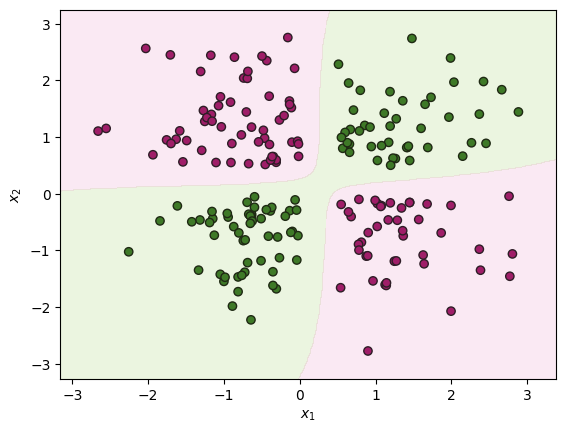

In [7]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.svm import SVC

# def k(x1, x2):
#   return np.dot(x1, x2.T)

def k(x1, x2):
  gamma = 0.2
  return np.exp( - gamma * euclidean_distances(x1, x2) ** 2. )

svm = SVC(kernel=k)

svm.fit(x, y)

plot_decision_surface(svm, x, y)

As you can see using a linear kernel we are still limited to drawing hyperplanes, let's go back and try out something more interesting...


Of course we do not need to define kernels functions by hand, they are already implemented in `scikit-learn`. We can also check which are the support vectors.

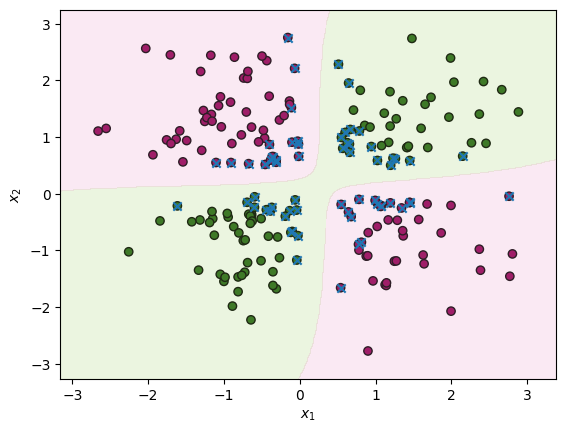

In [8]:
svm = SVC(kernel='rbf', gamma=.2)
svm.fit(x, y)

plot_decision_surface(svm, x, y)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], marker='x')
plt.show()

You can find more on the mathematical formulation of scikit-learn's SVC [here](https://scikit-learn.org/stable/modules/svm.html#svc).

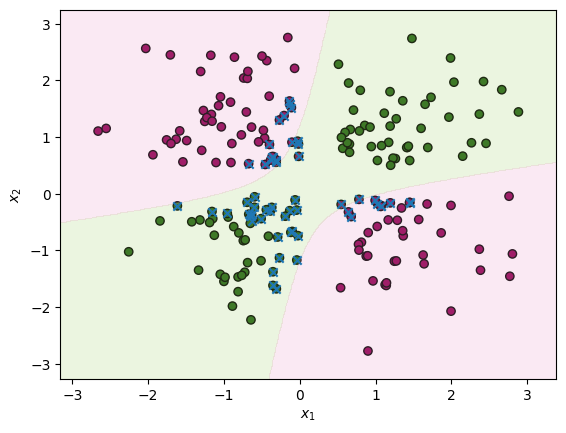

In [14]:
# Try polynomial of degree 2 kernel
svm = SVC(kernel='poly', degree=2)
svm.fit(x, y)

plot_decision_surface(svm, x, y)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], marker='x')
plt.show()

## A.2) Iris dataset

As a second case study, we are going to use the [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset, where the objective is to classify flowers based on some features:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

Let's give a look at the data. (we only use two features to make visualization easier)

In [ ]:
features = ["sepal length in cm" ,"sepal width in cm", "petal length in cm", "petal width in cm"]
features_used = [2,1]
x_prime = x[:, features_used]

plt.scatter(x_prime[:, 0], x_prime[:, 1], c=y)
plt.xlabel(features[features_used[0]])
plt.ylabel(features[features_used[1]])
plt.show()

In [ ]:
classifier = SVC(kernel='rbf', gamma=1)

classifier.fit(x_prime, y)

plot_decision_surface(classifier, x_prime, y)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')


Tuning correctly the hyperparameters is fundamental (check [here](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)).

In particular (for the `rbf` kernel):

* `C` : cost of a misclassification error
* `gamma`: $1 / \sigma$ of the Gaussian kernel

# B) Trees

Again we can use `scikitlearn` to build Decision Trees preatty easily in python.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3) # create an instance of the model
classifier.fit(x_prime, y)            # fit the data

plot_decision_surface(classifier, x_prime, y)
plt.xlabel(features[features_used[0]])
plt.ylabel(features[features_used[1]])



$\bf{Q:}$ What are the differences with k-nn?



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5) # create an instance of the model
classifier.fit(x_prime, y)            # fit the data

plot_decision_surface(classifier, x_prime, y)
plt.xlabel(features[features_used[0]])
plt.ylabel(features[features_used[1]])

Watch out for overfitting!

Now let's try to build a tree using all the features. To visualize the result we'll look directly at the tree.


In [ ]:
from sklearn.tree import plot_tree

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)
classifier.fit(x, y)  

plt.figure(figsize=(16,8))
plot_tree(classifier, filled=True, feature_names=iris.feature_names, rounded=True, class_names=iris.target_names);

Decision Trees are easy to interpret and that's why they are popular in financial applications.

# C) Random Forests

We saw during classes that the expected test error can be written as

$${error} = {bias}^2 + variance + noise$$

In general we cannot reduce the noise, we can reduce the bias increasing model complexity, but this makes the variance increase too.

Can we reduce the variance without increasing the bias and without getting more data? **Yes**



The idea is to take the average prediction of $K$ models. In fact, if we consider our model to be a random variable $X$, the variance of the mean is lower than the variance of the population, i.e., ${Var}(\overline X_K) \le Var(X)$ (using the CLT: ${Var}(\overline X_K) \approx \frac{Var(X)}{K})$.


The problem is that we have only a single training set: we can use **bootstrapping** (i.e., sampling with replacement) to learn the K models from K sets of bootstrapped samples.

This technique is known as **bagging** and works particularly well with trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20) 
model.fit(x_prime, y)           

plot_decision_surface(model, x_prime, y)
plt.xlabel(features[features_used[0]])
plt.ylabel(features[features_used[1]])

Being simple yet powerful, these methods are [very popular](https://storage.googleapis.com/kaggle-media/surveys/Kaggle%20State%20of%20Machine%20Learning%20and%20Data%20Science%202020.pdf) for practical applications.

## Pointers to some popular (different) methods

* `xgboost`: https://xgboost.readthedocs.io/en/latest/
* `lighgbm`: https://lightgbm.readthedocs.io/en/latest/

Note: these methods are based on **boosting**, an approach based on the idea of using a set of weak learners to iteratively reduce the error.